In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from PIL import Image
import numpy as np
from collections import Counter

In [3]:
zip_path = '/content/drive/MyDrive/Gender_classification.zip'
extract_path = '/content/gender_classification'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

train_dir = os.path.join(extract_path, 'Training')
validation_dir = os.path.join(extract_path, 'Validation')

In [4]:
root_path = "/content/gender_classification/Training/"
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(root_path + name)) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")
print(f"female : {class_dis[0]} \nmale : {class_dis[1]}")

Total Number of Classes : 2 
Class Names : ['female', 'male']
female : 23243 
male : 23766


In [5]:
# Step 4: Set up ImageDataGenerator for loading and preprocessing images
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.1,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [8]:
train_path = "/content/gender_classification/Training/"
train_dis = [len(os.listdir(train_path + name)) for name in class_names]
fig = px.pie(names=class_names, values=train_dis,
             title="train Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [9]:
valid_path = "/content/gender_classification/Validation/"
valid_dis = [len(os.listdir(valid_path + name)) for name in class_names]
fig = px.pie(names=class_names, values=valid_dis,
             title="test Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

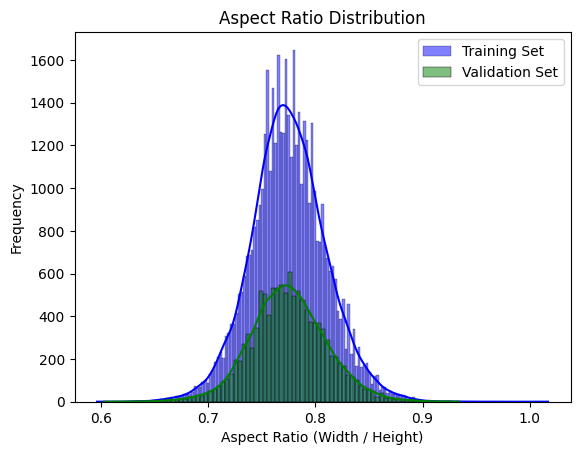

In [10]:
from PIL import Image

# Function to get image dimensions
def get_image_dimensions(directory):
    dimensions = []
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                with Image.open(img_path) as img:
                    dimensions.append(img.size)
    return dimensions

# Function to calculate aspect ratios
def calculate_aspect_ratios(dimensions):
    return [width / height for width, height in dimensions]

# Get image dimensions
train_dimensions = get_image_dimensions(train_dir)
validation_dimensions = get_image_dimensions(validation_dir)

# Now you can use train_dimensions and validation_dimensions
train_aspect_ratios = calculate_aspect_ratios(train_dimensions)
validation_aspect_ratios = calculate_aspect_ratios(validation_dimensions)

# Plot aspect ratio distribution using seaborn
sns.histplot(train_aspect_ratios, kde=True, color='blue', label='Training Set')
sns.histplot(validation_aspect_ratios, kde=True, color='green', label='Validation Set')
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

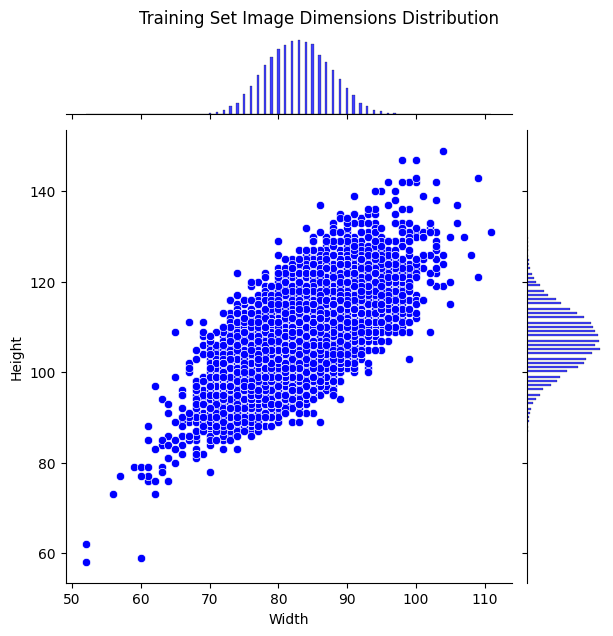

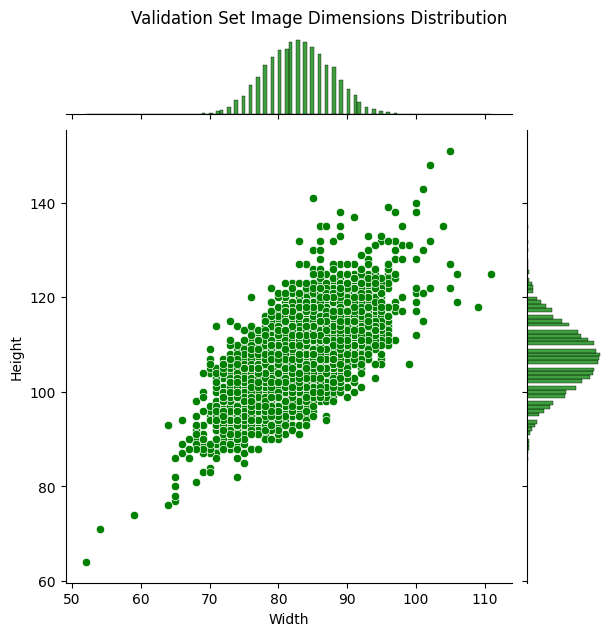

In [11]:
# Function to get image dimensions
def get_image_dimensions(directory):
    dimensions = []
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                with Image.open(img_path) as img:
                    dimensions.append(img.size)
    return dimensions

# Get dimensions for training and validation images
train_dimensions = get_image_dimensions(train_dir)
validation_dimensions = get_image_dimensions(validation_dir)

# Plot image dimensions distribution using seaborn
train_widths, train_heights = zip(*train_dimensions)
validation_widths, validation_heights = zip(*validation_dimensions)

sns.jointplot(x=train_widths, y=train_heights, kind='scatter', color='blue')
plt.suptitle('Training Set Image Dimensions Distribution', y=1.02)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

sns.jointplot(x=validation_widths, y=validation_heights, kind='scatter', color='green')
plt.suptitle('Validation Set Image Dimensions Distribution', y=1.02)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()


In [12]:
# Function to compute class counts
def compute_class_counts(directory):
    class_counts = {}
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if os.path.isdir(class_path):
            class_counts[class_dir] = len(os.listdir(class_path))
    return class_counts

# Compute class counts for training and validation datasets
train_counts = compute_class_counts(train_dir)
validation_counts = compute_class_counts(validation_dir)

# Convert counts dictionaries to DataFrames for plotting
train_df = pd.DataFrame(list(train_counts.items()), columns=['Class', 'Count'])
validation_df = pd.DataFrame(list(validation_counts.items()), columns=['Class', 'Count'])

# Plot class distribution using Plotly
fig = px.bar(train_df, x='Class', y='Count', title='Class Distribution in Training Set')
fig.show()

fig = px.bar(validation_df, x='Class', y='Count', title='Class Distribution in Validation Set')
fig.show()

In [13]:
train_generator[0][0].shape

(32, 150, 150, 3)

In [14]:
type(train_generator)

keras.src.preprocessing.image.DirectoryIterator

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/5
1470/1470 [==============================] - 366s 246ms/step - loss: 0.5145 - accuracy: 0.7521 - val_loss: 0.3257 - val_accuracy: 0.8633
Epoch 2/5
1470/1470 [==============================] - 356s 242ms/step - loss: 0.3619 - accuracy: 0.8435 - val_loss: 0.2507 - val_accuracy: 0.9002
Epoch 3/5
1470/1470 [==============================] - 358s 244ms/step - loss: 0.2896 - accuracy: 0.8800 - val_loss: 0.1992 - val_accuracy: 0.9238
Epoch 4/5
1470/1470 [==============================] - 358s 244ms/step - loss: 0.2547 - accuracy: 0.8973 - val_loss: 0.1875 - val_accuracy: 0.9272
Epoch 5/5
1470/1470 [==============================] - 362s 246ms/step - loss: 0.2347 - accuracy: 0.9067 - val_loss: 0.1577 - val_accuracy: 0.9385


In [22]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



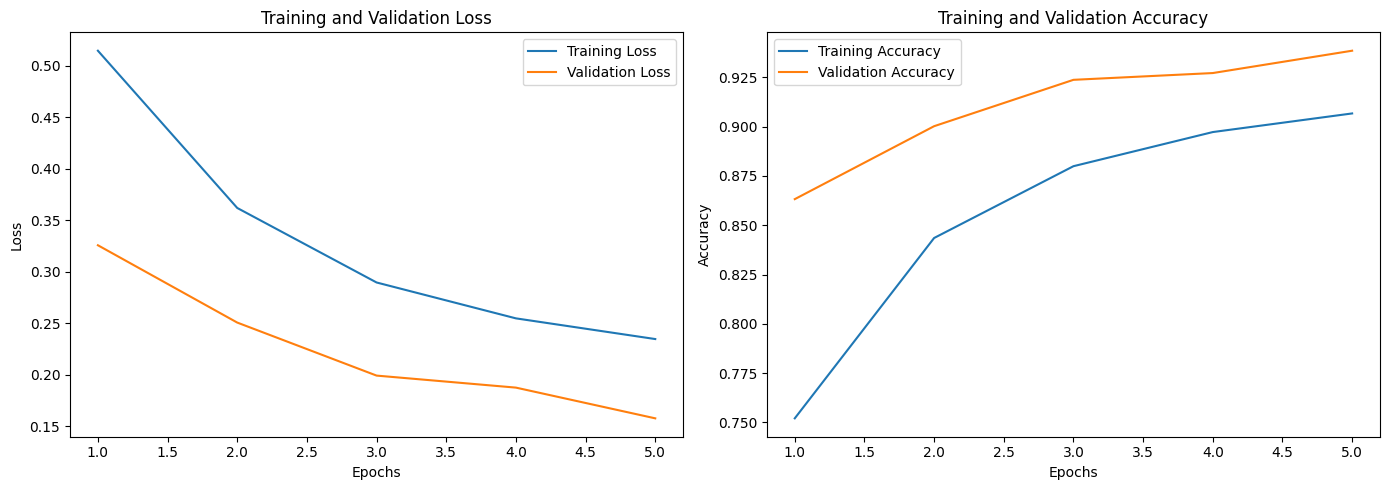

In [18]:
# Plotting epochs vs loss and epochs vs accuracy
epochs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()